In [1]:
import csv
import statistics
from scipy.stats import normaltest
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.stats import probplot

# MPU9250 acceleration noise (unit at rest)
The MPU9250 generates raw samples at 500Hz (gyro and accelerometer). The AHRS algorithm generates gravity compensated net earth z-axis acceleration values at the same rate. For the Kalman filter algorithm we are averaging and downsampling the gravity-compensated z acceleration to 50Hz ODR.

When the unit is at rest, these samples should be zero-mean as we have already calibrated the MPU9250. However, due to imperfect calibration, drift etc. there is a systematic residual bias, which the Kalman filter estimates and removes. 

There is also sensor noise, which is what we are interested in characterizing here for configuring the Kalman filter. The noise should be additive zero-mean Gaussian, and we need to estimate the noise variance.

In [2]:
accel = []
with open('accel_noise_512samples.txt', newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=' ')
    for row in csvreader:
        accel.append(float(row[0]))
accel_arr = np.array(accel)        
accel = []

# Accel Sensor Statistics

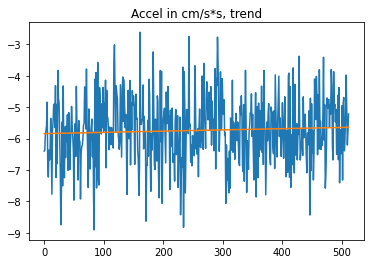

In [3]:
X = list(range(0, len(accel_arr) ) )
X = np.reshape(X, (len(X), 1))
model = LinearRegression()
model.fit(X, accel_arr)
trend = model.predict(X)
# plot trend
plt.plot(accel_arr)
plt.title('Accel in cm/s*s, trend')
plt.plot(trend)
plt.show()

# De-trend data

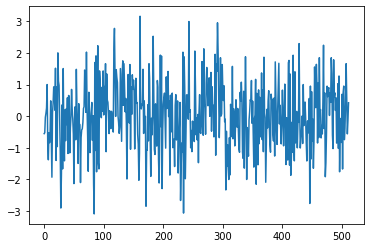

In [4]:
accel_detrended = accel_arr - trend
plt.plot(accel_detrended)
plt.show()

## Post-calibration residual acceleration bias

In [5]:
accel_mean = statistics.mean(accel_arr)
print("Residual bias = {0} cm/s/s".format(accel_mean))

Residual bias = -5.741865470703125 cm/s/s


## Acceleration sensor noise variance 

In [6]:
accel_variance = statistics.variance(accel_detrended)
print("Acceleration noise variance = {0} (cm/s/s)^2".format(accel_variance))

Acceleration noise variance = 1.1640630068073765 (cm/s/s)^2


In [7]:
statistic, p_value = normaltest(accel_detrended)
print("Acceleration noise normality test : p-value = {0}".format(p_value))

Acceleration noise normality test : p-value = 0.9839031734633318


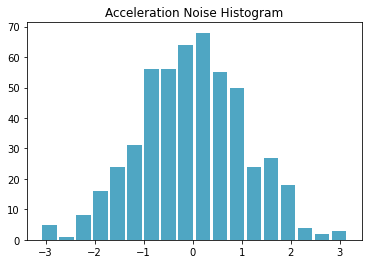

In [8]:
n, bins, patches = plt.hist(x=accel_detrended, bins='auto', color='#0580aa',
                            alpha=0.7, rwidth=0.85)
plt.title('Acceleration Noise Histogram')
plt.show()

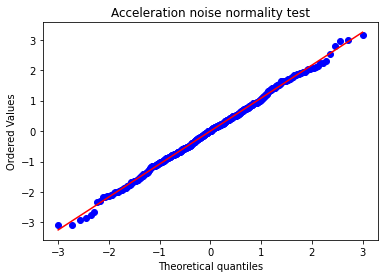

In [9]:
probplot(x=accel_detrended,dist='norm',plot=plt)
plt.title('Acceleration noise normality test')
plt.show()